#### Bhagyashree Deshpande

# 1. Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Understanding

### Initial Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.shape

(50, 5)

In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


From the above dataset we can see that the datatype of the State column is categorical data. So, we will drop the State column from the dataset for the further evaluation.

In [8]:
data_new = data.drop('State', axis = 1)
data_new.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
data_final = data_new.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MrtSpd'}, axis = 1)
data_final.head()

,RDS,Admin,MrtSpd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Assumption Check

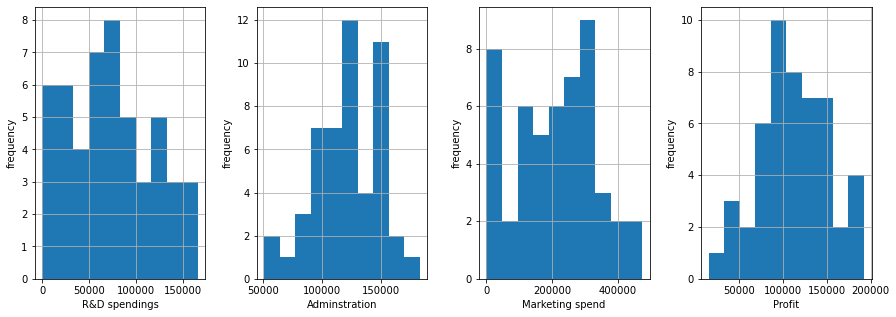

In [11]:
plt.figure(figsize = (15,5))

plt.subplot(1,4,1)
plt.xlabel('R&D spendings')
plt.ylabel('frequency')
data_final['RDS'].hist()

plt.subplot(1,4,2)
plt.xlabel('Adminstration')
plt.ylabel('frequency')
data_final['Admin'].hist()

plt.subplot(1,4,3)
plt.xlabel('Marketing spend')
plt.ylabel('frequency')
data_final['MrtSpd'].hist()

plt.subplot(1,4,4)
plt.xlabel('Profit')
plt.ylabel('frequency')
data_final['Profit'].hist()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

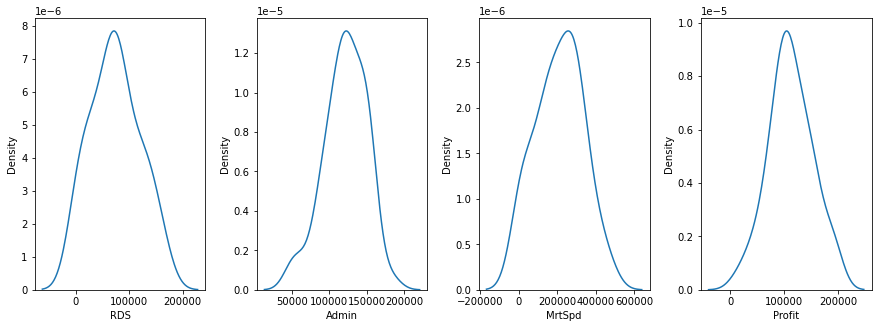

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,4,1)
sns.distplot(data_final['RDS'], hist = False)

plt.subplot(1,4,2)
sns.distplot(data_final['Admin'], hist = False)

plt.subplot(1,4,3)
sns.distplot(data_final['MrtSpd'], hist = False)

plt.subplot(1,4,4)
sns.distplot(data_final['Profit'], hist = False)

plt.subplots_adjust(wspace=0.3,hspace=0.3)

In [13]:
data_final['RDS'].skew(), data_final['RDS'].kurtosis()

(0.164002172321177, -0.7614645568424674)

In [14]:
data_final['Admin'].skew(), data_final['Admin'].kurtosis()

(-0.4890248099671768, 0.22507113536865386)

In [15]:
data_final['MrtSpd'].skew(), data_final['MrtSpd'].kurtosis()

(-0.04647226758360412, -0.6717011281297514)

In [16]:
data_final['Profit'].skew(), data_final['Profit'].kurtosis()

(0.023291019769116614, -0.06385888546853113)

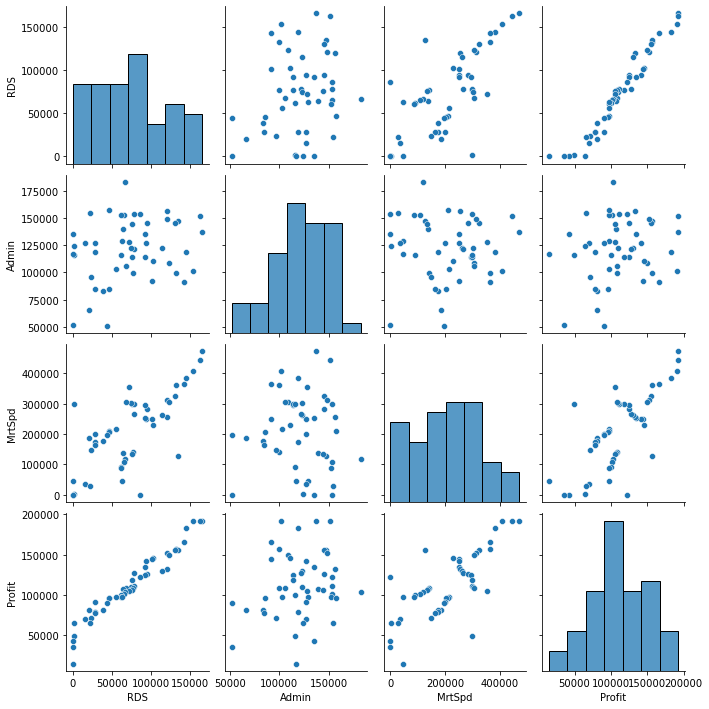

In [17]:
sns.pairplot(data_final)
plt.show()

## Model Building

### Standardization

In [18]:
array_data_final = data_final.values
standard_data_final = StandardScaler().fit_transform(array_data_final)
standard_data_final[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  2.01120333],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.99942997],
       [ 1.75436374, -0.72825703,  1.62652767,  1.98084225],
       [ 1.55478369, -0.09636463,  1.42221024,  1.77662724],
       [ 1.5049372 , -1.07991935,  1.28152771,  1.35774012]])

In [19]:
df = pd.DataFrame({'RDS': standard_data_final[:,0], 'Admin': standard_data_final[:,1], 'MrtSpd': standard_data_final[:,2], 'Profit': standard_data_final[:,3]})
df.head()

,RDS,Admin,MrtSpd,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


### Fitting various models

#### Model - 1

In [20]:
model_1 = smf.ols('Profit~RDS', data = df).fit()

In [21]:
model_1.params

Intercept   -5.377643e-16
RDS          9.729005e-01
dtype: float64

In [22]:
model_1.pvalues,model_1.tvalues

(Intercept    1.000000e+00
 RDS          3.500322e-32
 dtype: float64,
 Intercept   -1.611310e-14
 RDS          2.915114e+01
 dtype: float64)

In [23]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           3.50e-32
Time:                        17:23:47   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.033  -1.61e-14      1.000      -0.067       0.067
RDS            0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [24]:
pred_1 = model_1.predict(df)
pred_1.head()

0    1.961768
1    1.902857
2    1.706821
3    1.512650
4    1.464154
dtype: float64

In [25]:
root_1 = sqrt(mean_squared_error(df.Profit, pred_1))
root_1

0.23122431515643158

#### Model - 2

In [26]:
model_2 = smf.ols('Profit~Admin', data = df).fit()

In [27]:
model_2.params

Intercept   -5.377643e-16
Admin        2.007166e-01
dtype: float64

In [28]:
model_2.pvalues,model_2.tvalues

(Intercept    1.000000
 Admin        0.162217
 dtype: float64,
 Intercept   -3.803136e-15
 Admin        1.419493e+00
 dtype: float64)

In [29]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 16 Jan 2022   Prob (F-statistic):              0.162
Time:                        17:23:50   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.141   -3.8e-15      1.000      -0.284       0.284
Admin          0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [30]:
pred_2 = model_2.predict(df)
pred_2.head()

0    0.112552
1    0.217337
2   -0.146173
3   -0.019342
4   -0.216758
dtype: float64

In [31]:
root_2 = sqrt(mean_squared_error(df.Profit, pred_2))
root_2

0.9796493552401428

#### Model - 3

In [32]:
model_3 = smf.ols('Profit~MrtSpd', data = df).fit()

In [33]:
model_3.params

Intercept   -5.377643e-16
MrtSpd       7.477657e-01
dtype: float64

In [34]:
model_3.pvalues, model_3.tvalues

(Intercept    1.000000e+00
 MrtSpd       4.381073e-10
 dtype: float64,
 Intercept   -5.611370e-15
 MrtSpd       7.802657e+00
 dtype: float64)

In [35]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           4.38e-10
Time:                        17:23:52   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.096  -5.61e-15      1.000      -0.193       0.193
MrtSpd         0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [36]:
pred_3 =model_3.predict(df)
pred_3.head()

0    1.610645
1    1.438402
2    1.216262
3    1.063480
4    0.958282
dtype: float64

In [37]:
root_3 = sqrt(mean_squared_error(df.Profit, pred_3))
root_3

0.6639626686707986

#### Model - 4

In [38]:
model_4 = smf.ols('Profit~RDS+Admin', data = df).fit()

In [39]:
model_4.params

Intercept   -5.377643e-16
RDS          9.818137e-01
Admin       -3.683841e-02
dtype: float64

In [40]:
model_4.pvalues, model_4.tvalues

(Intercept    1.000000e+00
 RDS          2.278348e-31
 Admin        2.888932e-01
 dtype: float64,
 Intercept   -1.613836e-14
 RDS          2.858887e+01
 Admin       -1.072677e+00
 dtype: float64)

In [41]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           7.29e-31
Time:                        17:23:55   Log-Likelihood:                 2.8761
No. Observations:                  50   AIC:                            0.2478
Df Residuals:                      47   BIC:                             5.984
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.033  -1.61e-14      1.000      -0.067       0.067
RDS            0.9818      0.034     28.589      0.000       0.913       1.051
Admin         -0.0368      0.034     -1.073      0.289      -0.106       0.032
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [42]:
pred_4 = model_4.predict(df)
pred_4.head()

0    1.959083
1    1.880402
2    1.749286
3    1.530058
4    1.517350
dtype: float64

In [43]:
root_4 = sqrt(mean_squared_error(df.Profit, pred_4))
root_4

0.22844487628109053

#### Model - 5

In [44]:
model_5 = smf.ols('Profit~RDS+MrtSpd', data = df).fit()

In [45]:
model_5.params

Intercept   -5.377643e-16
RDS          9.071811e-01
MrtSpd       9.074150e-02
dtype: float64

In [46]:
model_5.pvalues, model_5.tvalues

(Intercept    1.000000e+00
 RDS          6.040433e-24
 MrtSpd       6.003040e-02
 dtype: float64,
 Intercept   -1.656229e-14
 RDS          1.926556e+01
 MrtSpd       1.927052e+00
 dtype: float64)

In [47]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.16e-31
Time:                        17:23:56   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.032  -1.66e-14      1.000      -0.065       0.065
RDS            0.9072      0.047     19.266      0.000       0.812       1.002
MrtSpd         0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [48]:
pred_5 = model_5.predict(df)
pred_5.head()

0    2.024702
1    1.948870
2    1.739119
3    1.539524
4    1.481538
dtype: float64

In [49]:
root_5 = sqrt(mean_squared_error(df.Profit, pred_5))
root_5

0.22259761553984292

#### Model - 6

In [50]:
model_6 = smf.ols('Profit~Admin+MrtSpd', data = df).fit()

In [51]:
model_6.params

Intercept   -5.377643e-16
Admin        2.249927e-01
MrtSpd       7.550001e-01
dtype: float64

In [52]:
model_6.pvalues, model_6.tvalues

(Intercept    1.000000e+00
 Admin        1.729198e-02
 MrtSpd       9.727245e-11
 dtype: float64,
 Intercept   -5.901391e-15
 Admin        2.467779e+00
 MrtSpd       8.281039e+00
 dtype: float64)

In [53]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        17:23:58   Log-Likelihood:                -47.424
No. Observations:                  50   AIC:                             100.8
Df Residuals:                      47   BIC:                             106.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.091   -5.9e-15      1.000      -0.183       0.183
Admin          0.2250      0.091      2.468      0.017       0.042       0.408
MrtSpd         0.7550      0.091      8.281      0.000       0.572       0.938
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [54]:
pred_6 = model_6.predict(df)
pred_6.head()

0    1.752393
1    1.695942
2    1.064176
3    1.052088
4    0.724580
dtype: float64

In [55]:
root_6 = sqrt(mean_squared_error(df.Profit, pred_6))
root_6

0.6247215582344935

#### Model - 7

In [56]:
model_7 = smf.ols('Profit~RDS+Admin+MrtSpd', data = df).fit()

In [57]:
model_7.params

Intercept   -5.342948e-16
RDS          9.175798e-01
Admin       -1.864043e-02
MrtSpd       8.261087e-02
dtype: float64

In [58]:
model_7.pvalues, model_7.tvalues

(Intercept    1.000000e+00
 RDS          2.634968e-22
 Admin        6.017551e-01
 MrtSpd       1.047168e-01
 dtype: float64,
 Intercept   -1.632823e-14
 RDS          1.784637e+01
 Admin       -5.255068e-01
 MrtSpd       1.655077e+00
 dtype: float64)

In [59]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        17:24:00   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.343e-16      0.033  -1.63e-14      1.000      -0.066       0.066
RDS            0.9176      0.051     17.846      0.000       0.814       1.021
Admin         -0.0186      0.035     -0.526      0.602      -0.090       0.053
MrtSpd         0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [60]:
pred_7 = model_7.predict(df)
pred_7.head()

0    2.017705
1    1.933384
2    1.757713
3    1.545924
4    1.506898
dtype: float64

In [61]:
root_7 = sqrt(mean_squared_error(df.Profit, pred_7))
root_7

0.2219324355106198

## Conclusion

In [62]:
Conclusion = {'Model':['model_1','model_2','model_3','model_4','model_5','model_6','model_7'], 'R_Squared Value':(model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared,model_6.rsquared,model_7.rsquared), 'Adj_Rsquared Value':(model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj,model_4.rsquared_adj,model_5.rsquared_adj,model_6.rsquared_adj,model_7.rsquared_adj), "RMSE":(root_1,root_2,root_3,root_4,root_5,root_6,root_7), "P Value": (model_1.pvalues[1],model_2.pvalues[1],model_3.pvalues[1],model_4.pvalues[1],model_5.pvalues[1],model_6.pvalues[1],model_7.pvalues[2])}
Conclusion = pd.DataFrame(Conclusion)
Conclusion

,Model,R_Squared Value,Adj_Rsquared Value,RMSE,P Value
0,model_1,0.946535,0.945421,0.231224,3.500322e-32
1,model_2,0.040287,0.020293,0.979649,1.622174e-01
2,model_3,0.559154,0.549969,0.663963,4.381073e-10
3,model_4,0.947813,0.945592,0.228445,2.278348e-31
4,model_5,0.950450,0.948342,0.222598,6.040433e-24
5,model_6,0.609723,0.593115,0.624722,1.729198e-02
6,model_7,0.950746,0.947534,0.221932,6.017551e-01


### Conclusion

Model 5 and Model 7 have the highest R-Squared and Adjusted R-Squared values and lowest errors.

By observing the P - values, we conclude that Model 5 is less compared to Model 7.

Hence, the best model for predicting the Profit is Model 5.

## ======================================================================

# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
data = pd.read_csv('ToyotaCorolla.csv', encoding = 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Data Understanding

### Initial Ananlysis

In [4]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
toyota_data = data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax','Weight']]
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
toyota = toyota_data.rename({'Age_08_04': 'Age', 'Quarterly_Tax': 'QT', 'Weight': 'Wt'}, axis = 1)
toyota.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Wt      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
toyota[toyota.duplicated(keep = False)]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
toyota = toyota.drop_duplicates()

In [10]:
toyota.shape

(1435, 9)

In [11]:
toyota.dtypes

Price    int64
Age      int64
KM       int64
HP       int64
cc       int64
Doors    int64
Gears    int64
QT       int64
Wt       int64
dtype: object

In [12]:
toyota.isna().sum()

Price    0
Age      0
KM       0
HP       0
cc       0
Doors    0
Gears    0
QT       0
Wt       0
dtype: int64

In [13]:
toyota.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [14]:
toyota.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### Assumption Check

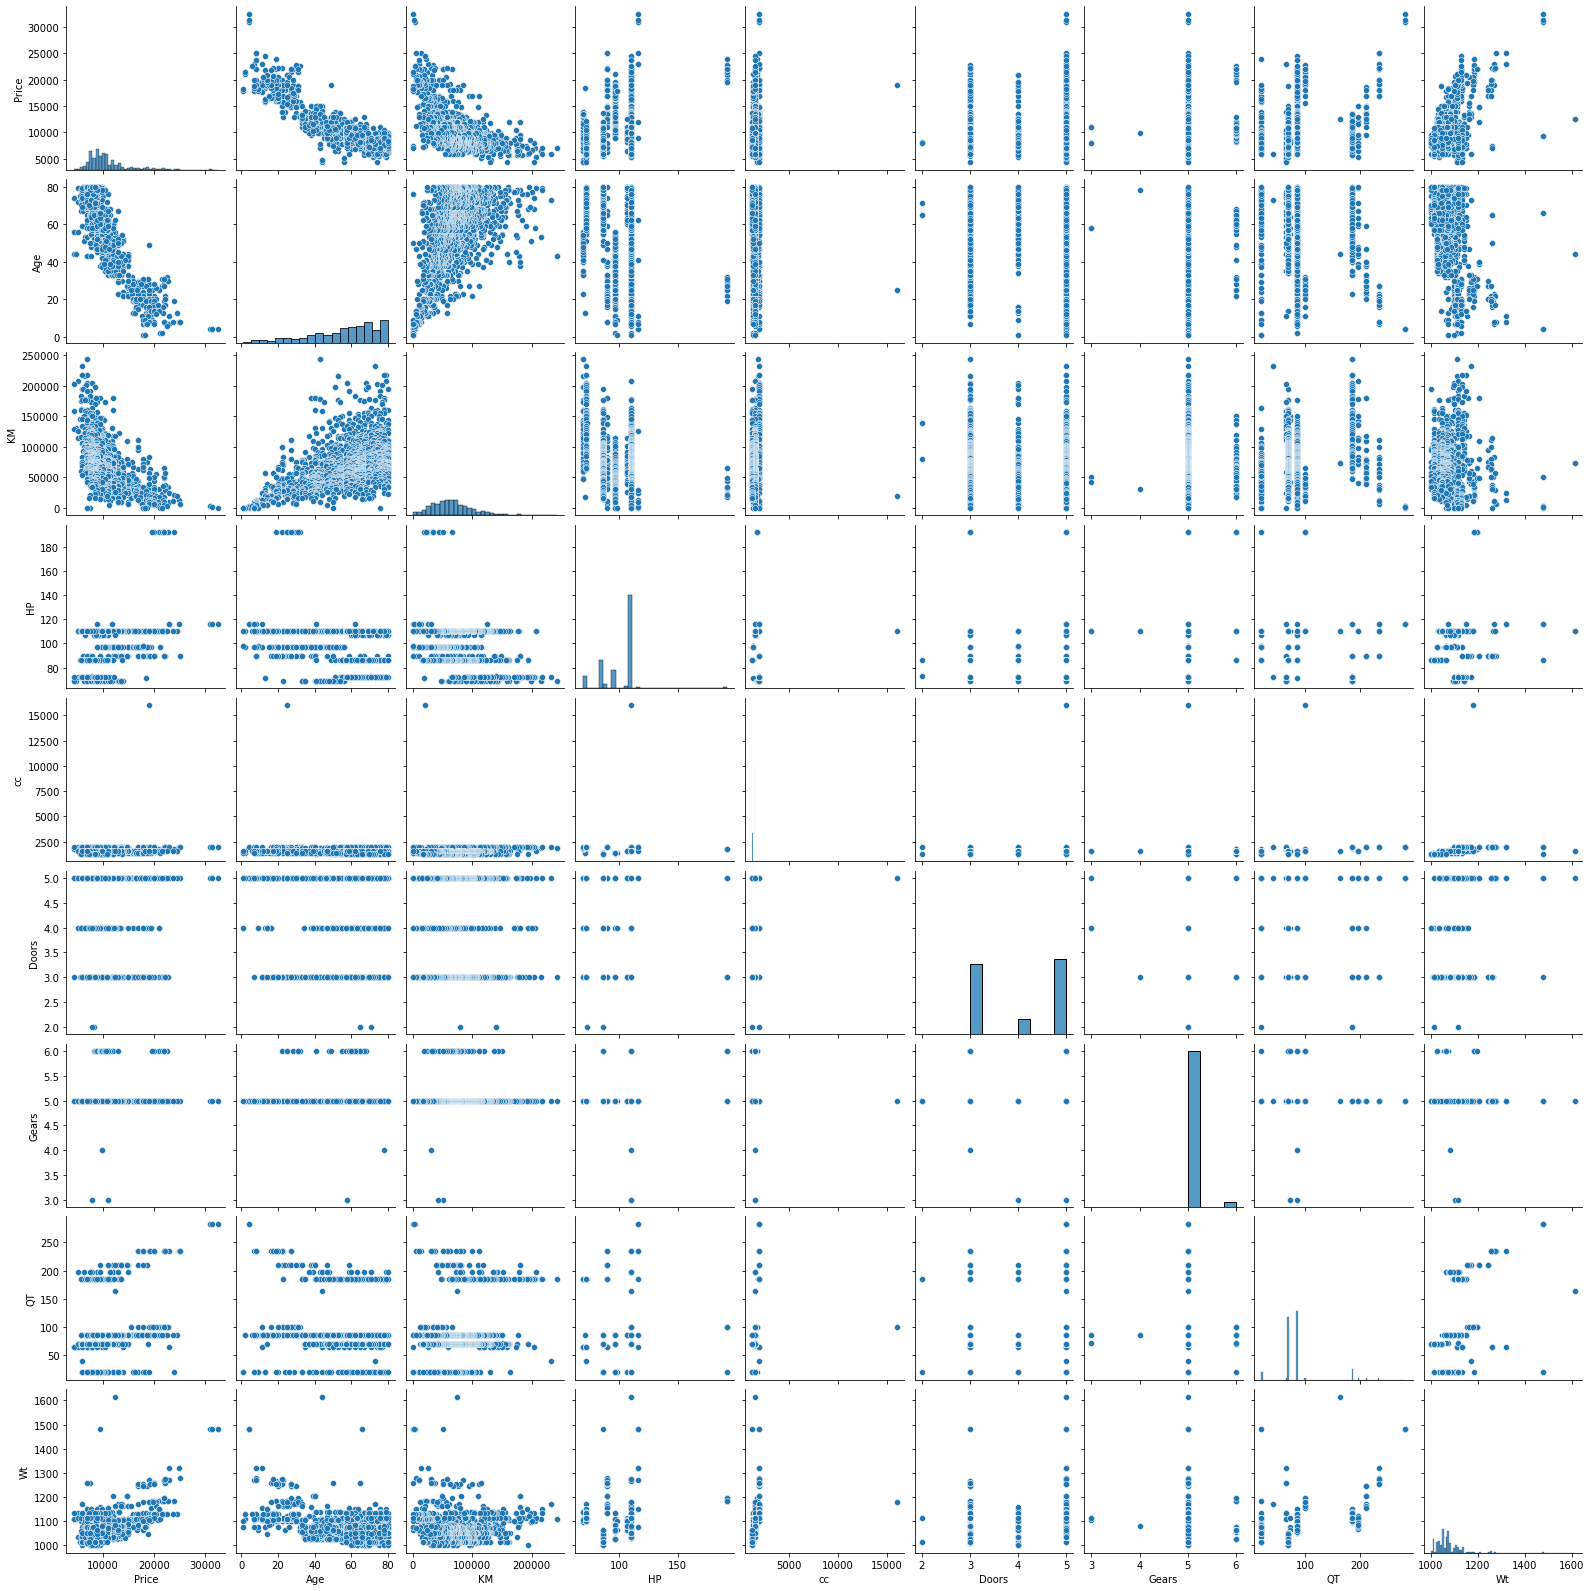

In [15]:
sns.pairplot(toyota)
plt.show()

## Model Building

### Model - 1

In [18]:
model_1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Wt', data = toyota).fit()

In [19]:
model_1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Wt             16.855470
dtype: float64

In [20]:
model_1.pvalues, model_1.tvalues

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Wt            1.031118e-51
 dtype: float64,
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Wt           15.760663
 dtype: float64)

In [21]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:09:45   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Building

In [25]:
pred_1 = model_1.predict(toyota)
pred_1.head()

0    16791.958871
1    16253.800414
2    16779.635210
3    16405.789389
4    16200.217277
dtype: float64

In [26]:
root_1 = sqrt(mean_squared_error(pred_1, toyota.Price))
root_1

1337.590250731075

### Model - 2

In [34]:
model_2 = smf.ols('Price~KM+HP+cc+Gears+QT+Wt', data = toyota).fit()

In [35]:
model_2.params

Intercept   -29620.515983
KM              -0.052574
HP              26.455313
cc              -0.169381
Gears          748.156793
QT               8.337590
Wt              34.545265
dtype: float64

In [36]:
model_2.pvalues, model_2.tvalues

(Intercept     4.690734e-43
 KM           1.459791e-166
 HP            3.601703e-09
 cc            2.358538e-01
 Gears         1.483544e-02
 QT            5.810265e-05
 Wt            4.529151e-97
 dtype: float64,
 Intercept   -14.227120
 KM          -31.593187
 HP            5.938736
 cc           -1.185913
 Gears         2.439333
 QT            4.032500
 Wt           22.619470
 dtype: float64)

In [37]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     449.1
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:26:16   Log-Likelihood:                -13029.
No. Observations:                1435   AIC:                         2.607e+04
Df Residuals:                    1428   BIC:                         2.611e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.962e+04   2081.976    -14.227      0.000   -3.37e+04   -2.55e+04
KM            -0.0526      0.002    -31.593      0.000      -0.056      -0.049
HP            26.4553      4.455      5.939      0.000      17.717      35.194
cc            -0.1694      0.143     -1.186      0.236      -0.450       0.111
Gears        748.1568    306.705      2.439      0.015     146.515    1349.798
QT             8.3376      2.068      4.032      0.000       4.282      12.393
Wt            34.5453      1.527     22.619      0.000      31.549      37.541
==============================================================================
Omnibus:                      241.252   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.227
Skew:                          -0.497   Prob(JB):                         0.00
Kurtosis:                       8.944   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [38]:
pred_2 = model_2.predict(toyota)
pred_2.head()

0    15688.359980
1    14324.006017
2    15965.689068
3    15635.049706
4    16307.231261
dtype: float64

In [39]:
root_2 = sqrt(mean_squared_error(pred_2, toyota.Price))
root_2

2123.231788462658

### Model - 3

In [45]:
model_3 = smf.ols('Price~Age+KM+HP+cc+Gears+QT', data = toyota).fit()

In [46]:
model_3.params

Intercept    11235.648494
Age           -137.342754
KM              -0.019748
HP              44.926750
cc               0.117591
Gears          469.898686
QT              16.328269
dtype: float64

In [47]:
model_3.pvalues, model_3.tvalues

(Intercept    1.380781e-25
 Age          0.000000e+00
 KM           1.350517e-44
 HP           2.205048e-49
 cc           2.242144e-01
 Gears        2.557959e-02
 QT           9.794478e-43
 dtype: float64,
 Intercept    10.660892
 Age         -51.899049
 KM          -14.508389
 HP           15.358091
 cc            1.215925
 Gears         2.234877
 QT           14.168233
 dtype: float64)

In [48]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:28:56   Log-Likelihood:                -12488.
No. Observations:                1435   AIC:                         2.499e+04
Df Residuals:                    1428   BIC:                         2.503e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.124e+04   1053.913     10.661      0.000    9168.265    1.33e+04
Age         -137.3428      2.646    -51.899      0.000    -142.534    -132.152
KM            -0.0197      0.001    -14.508      0.000      -0.022      -0.017
HP            44.9267      2.925     15.358      0.000      39.188      50.665
cc             0.1176      0.097      1.216      0.224      -0.072       0.307
Gears        469.8987    210.257      2.235      0.026      57.453     882.345
QT            16.3283      1.152     14.168      0.000      14.068      18.589
==============================================================================
Omnibus:                      218.686   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.167
Skew:                           0.713   Prob(JB):                    7.90e-174
Kurtosis:                       6.361   Cond. No.                     2.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [49]:
pred_3 = model_3.predict(toyota)
pred_3.head()

0    17205.916028
1    16693.442186
2    17172.742652
3    16773.863549
4    16412.096152
dtype: float64

In [50]:
root_3 = sqrt(mean_squared_error(pred_3, toyota.Price))
root_3

1456.5646756066342

### Model - 4

In [51]:
model_4 = smf.ols('Price~Age+KM+HP+cc+QT+Wt', data = toyota).fit()

In [52]:
model_4.params

Intercept   -2556.724129
Age          -121.848184
KM             -0.020466
HP             33.603740
cc             -0.121928
QT              4.102989
Wt             16.718303
dtype: float64

In [53]:
model_4.pvalues, model_4.tvalues

(Intercept     1.533829e-02
 Age          4.557288e-288
 KM            3.757222e-55
 HP            6.209703e-33
 cc            1.770511e-01
 QT            1.744321e-03
 Wt            7.541690e-54
 dtype: float64,
 Intercept    -2.427214
 Age         -46.486637
 KM          -16.339822
 HP           12.261299
 cc           -1.350558
 QT            3.136559
 Wt           16.121757
 dtype: float64)

In [54]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:34:17   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2556.7241   1053.358     -2.427      0.015   -4623.019    -490.430
Age         -121.8482      2.621    -46.487      0.000    -126.990    -116.706
KM            -0.0205      0.001    -16.340      0.000      -0.023      -0.018
HP            33.6037      2.741     12.261      0.000      28.228      38.980
cc            -0.1219      0.090     -1.351      0.177      -0.299       0.055
QT             4.1030      1.308      3.137      0.002       1.537       6.669
Wt            16.7183      1.037     16.122      0.000      14.684      18.753
==============================================================================
Omnibus:                      146.239   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.220
Skew:                          -0.206   Prob(JB):                    2.51e-205
Kurtosis:                       6.948   Cond. No.                     2.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [55]:
pred_4 = model_4.predict(toyota)
pred_4.head()

0    16798.085749
1    16266.974041
2    16784.195419
3    16411.788730
4    16202.413973
dtype: float64

In [56]:
root_4 = sqrt(mean_squared_error(pred_4, toyota.Price))
root_4

1342.0765406301691

## Conclusion

In [57]:
Conclusion = {'Model':['model_1','model_2','model_3','model_4'], 'R_Squared Value':(model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared), 'Adj_Rsquared Value':(model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj,model_4.rsquared_adj), "RMSE":(root_1,root_2,root_3,root_4)}
Conclusion = pd.DataFrame(Conclusion)
Conclusion

,Model,R_Squared Value,Adj_Rsquared Value,RMSE
0,model_1,0.862520,0.861749,1337.590251
1,model_2,0.653592,0.652136,2123.231788
2,model_3,0.836976,0.836291,1456.564676
3,model_4,0.861596,0.861015,1342.076541


### Conclusion

From the table, we observe that Model 1 provides better R-squared and Adjusted R-squared values and also the lowest RMSE values.
Hence Model 1 is good for prediction of Price.